In [76]:
import zipfile

zip_ref = zipfile.ZipFile("/content/jigsaw-toxic-comment-classification-challenge.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [77]:
zip_ref = zipfile.ZipFile("/content/test_labels.csv.zip", "r")
zip_ref.extractall()
zip_ref.close()

### Understanding the data!

In [78]:
import pandas as pd
import numpy as np

# Read in data

comments = pd.read_csv("/content/train.csv.zip")
test_data = pd.read_csv("/content/test.csv.zip")
test_label = pd.read_csv("/content/test_labels.csv")

comments.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [79]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [80]:
# Looking through the test data
test_label[test_label.toxic < 0]

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [81]:
comments[comments.threat < 0]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [82]:

random_number = np.random.randint(0, len(comments))


comments["comment_text"][random_number], comments.iloc[random_number]

("Another question, does this style information stripping occur only whenever a shape itself is edited, or for less intrusive edits, such as moving a shape around? If even highlighting and selecting the shape in Inkscape makes it unusable, then I shouldn't even be messing with Inkscape at all.",
 id                                                00b9c08a7c708e0a
 comment_text     Another question, does this style information ...
 toxic                                                            0
 severe_toxic                                                     0
 obscene                                                          0
 threat                                                           0
 insult                                                           0
 identity_hate                                                    0
 Name: 290, dtype: object)

This seems to only show neutral messages, create function to view negative messages as well

In [83]:
negative = comments[comments.threat > 0]
negative.reset_index(drop=True, inplace=True)
negative


random_number = np.random.randint(0, len(negative))


negative["comment_text"][random_number], negative.iloc[random_number]

('I will fucking cut your heart out. I will set you on fire motherfucker.',
 id                                                63d454e7ce0a244b
 comment_text     I will fucking cut your heart out. I will set ...
 toxic                                                            1
 severe_toxic                                                     0
 obscene                                                          1
 threat                                                           1
 insult                                                           1
 identity_hate                                                    0
 Name: 120, dtype: object)

### Preprocessing the data

In [84]:
# Split training data

train_words = comments["comment_text"]
train_labels = comments

train_labels.drop("id", axis=1, inplace=True)
train_labels.drop("comment_text", axis=1, inplace=True)

train_labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [85]:
train_words, train_labels

(0         Explanation\nWhy the edits made under my usern...
 1         D'aww! He matches this background colour I'm s...
 2         Hey man, I'm really not trying to edit war. It...
 3         "\nMore\nI can't make any real suggestions on ...
 4         You, sir, are my hero. Any chance you remember...
                                 ...                        
 159566    ":::::And for the second time of asking, when ...
 159567    You should be ashamed of yourself \n\nThat is ...
 159568    Spitzer \n\nUmm, theres no actual article for ...
 159569    And it looks like it was actually you who put ...
 159570    "\nAnd ... I really don't think you understand...
 Name: comment_text, Length: 159571, dtype: object,
         toxic  severe_toxic  obscene  threat  insult  identity_hate
 0           0             0        0       0       0              0
 1           0             0        0       0       0              0
 2           0             0        0       0       0              0
 

In [86]:
test_data.drop("id", axis=1, inplace=True)
test_label, test_data

(                      id  toxic  severe_toxic  obscene  threat  insult  \
 0       00001cee341fdb12     -1            -1       -1      -1      -1   
 1       0000247867823ef7     -1            -1       -1      -1      -1   
 2       00013b17ad220c46     -1            -1       -1      -1      -1   
 3       00017563c3f7919a     -1            -1       -1      -1      -1   
 4       00017695ad8997eb     -1            -1       -1      -1      -1   
 ...                  ...    ...           ...      ...     ...     ...   
 153159  fffcd0960ee309b5     -1            -1       -1      -1      -1   
 153160  fffd7a9a6eb32c16     -1            -1       -1      -1      -1   
 153161  fffda9e8d6fafa9e     -1            -1       -1      -1      -1   
 153162  fffe8f1340a79fc2     -1            -1       -1      -1      -1   
 153163  ffffce3fb183ee80     -1            -1       -1      -1      -1   
 
         identity_hate  
 0                  -1  
 1                  -1  
 2                  -1 

In [87]:
train_words.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [88]:
# Calculate the length of the longest sentence in the train_words list
longest_sentence_length = train_words.str.split().apply(len).max()

# Retrieve the longest sentence
longest_sentence = train_words[train_words.str.split().apply(len) == longest_sentence_length].iloc[0]
print("Longest Sentence:", longest_sentence)
print("Length of Longest Sentence:", longest_sentence_length)


Longest Sentence: I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN LOSER ==== I AM AN LOSER == == I AM AN

Create a layer that turns the text into tokens

In [89]:
import tensorflow as tf
# Create token layer
tokenizer = tf.keras.layers.TextVectorization(max_tokens=None,
                                                    standardize='lower_and_strip_punctuation',
                                                    split='whitespace',
                                                    ngrams=None,
                                                    output_mode='int',
                                                    output_sequence_length=None,
                                                    pad_to_max_tokens=False,
                                                    vocabulary=None,
                                                    idf_weights=None,
                                                    sparse=False,
                                                    ragged=False,
                                                    encoding='utf-8')


In [90]:

max_vocab_length = 10000
max_len = longest_sentence_length

tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=max_vocab_length,
    output_mode="int",
    output_sequence_length=None if "int" == "int" else max_len
)


In [91]:
tokenizer.adapt(train_words)

In [92]:
import random
# Choose a random sentence from the training dataset and tokenize it
sent = random.choice(train_words)

sent, tokenizer([sent])

('I think it should remain semi-protected at least until she is seated, as more and more information becomes known about her.216.227.243.189',
 <tf.Tensor: shape=(1, 21), dtype=int64, numpy=
 array([[   8,   69,   12,   59, 1235, 3618,   34,  291,  362,  220,    9,
            1,   18,   60,    5,   60,  101, 2098,  452,   35,    1]])>)

In [93]:
# Embedding

embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_len, # how long is each input
                             name="embedding_1")

embedding

In [94]:
import random
# Choose a random sentence from the training dataset and tokenize it
sent = random.choice(train_words)

sent, embedding(tokenizer([sent]))

("Well if a someone didn't have the page locked out I'd try it.",
 <tf.Tensor: shape=(1, 13, 128), dtype=float32, numpy=
 array([[[-0.03536388, -0.010707  ,  0.03123896, ..., -0.04061673,
           0.01368629,  0.02949807],
         [ 0.036784  , -0.04332003, -0.02619568, ...,  0.01923467,
          -0.03111422, -0.02222209],
         [-0.02644687,  0.01358726, -0.03306861, ...,  0.02463746,
           0.01434277,  0.03252169],
         ...,
         [ 0.01151608, -0.01004633,  0.00488796, ..., -0.04602627,
           0.01806572, -0.0100371 ],
         [ 0.04479381, -0.02720099,  0.04266169, ..., -0.04657724,
          -0.01514005,  0.01605309],
         [ 0.01411705,  0.01356652,  0.01352664, ...,  0.03857947,
           0.02564171,  0.02436905]]], dtype=float32)>)

### Modeling Time!

In [95]:
# Build the model
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")
x = tokenizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(6, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

#Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [96]:
# Forgot to remove id columns
# Remove id column
test_label.drop('id', axis=1, inplace = True)
test_label

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...
153159,-1,-1,-1,-1,-1,-1
153160,-1,-1,-1,-1,-1,-1
153161,-1,-1,-1,-1,-1,-1
153162,-1,-1,-1,-1,-1,-1


In [97]:
# The shape looks good now
test_label.shape, train_labels.shape

((153164, 6), (159571, 6))

In [98]:
# Fit the model
model_1_history = model_1.fit(train_words, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(test_data, test_label))

Epoch 1/5
4987/4987 [==============================] - 182s 36ms/step - loss: 0.1328 - accuracy: 0.9554 - val_loss: -2.3698 - val_accuracy: 0.9225
Epoch 2/5
4987/4987 [==============================] - 74s 15ms/step - loss: 0.1026 - accuracy: 0.8387 - val_loss: -2.5612 - val_accuracy: 0.7945
Epoch 3/5
4987/4987 [==============================] - 69s 14ms/step - loss: 0.0928 - accuracy: 0.7588 - val_loss: -2.5786 - val_accuracy: 0.7818
Epoch 4/5
4987/4987 [==============================] - 88s 18ms/step - loss: 0.0868 - accuracy: 0.7212 - val_loss: -2.8217 - val_accuracy: 0.7329
Epoch 5/5
4987/4987 [==============================] - 66s 13ms/step - loss: 0.0829 - accuracy: 0.6874 - val_loss: -2.8298 - val_accuracy: 0.6952


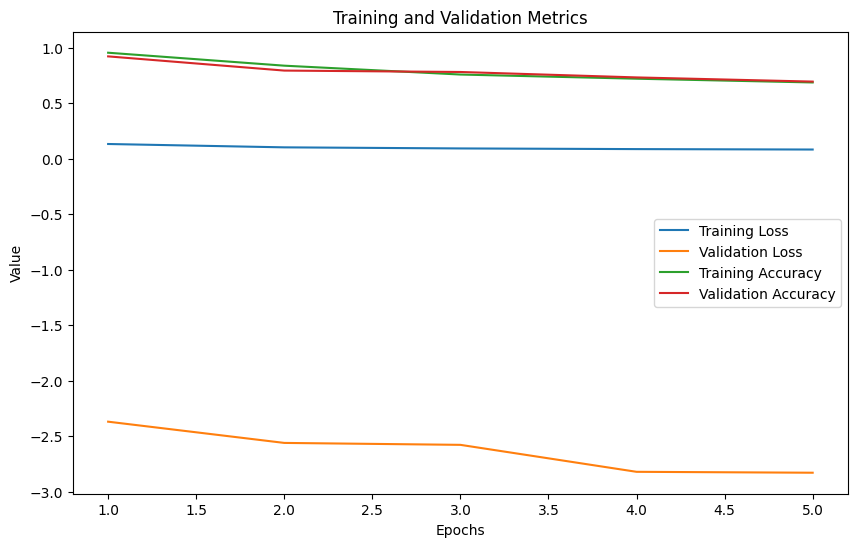

In [101]:
import matplotlib.pyplot as plt

# Get the loss values and accuracies
train_loss = model_1_history.history['loss']
val_loss = model_1_history.history['val_loss']
train_accuracy = model_1_history.history['accuracy']
val_accuracy = model_1_history.history['val_accuracy']

# Create a single plot for both losses and accuracies
plt.figure(figsize=(10, 6))

# Plot the losses
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')

# Plot the accuracies
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()


The model training results show an improvement in accuracy from the first to the last epoch. However, overfitting is evident as the validation accuracy is lower compared to the training accuracy.

The initial epoch achieved a high training accuracy of 95.54% and a validation accuracy of 92.25%. Subsequent epochs witnessed a decline in accuracy, with the training accuracy dropping to 68.74% and the validation accuracy decreasing to 69.52% by the fifth epoch.

The loss values decreased consistently throughout the epochs, indicating learning and convergence. However, the negative validation loss values are unexpected and may indicate irregularities or model issues.